In [5]:
#Code proposé par M.Nataf:Séance 1
import scipy.io as spi
import numpy as np
import matplotlib.pyplot as plt

mat=spi.loadmat("base_apprentissage.mat")
data_app=np.transpose(mat['data'])
label_app=np.array(mat['label'])[0] #label: chiffre numérisé
label_app=label_app.astype(int)

Nous modifions principalement notre méthode de définition de la base de test

Découpe aléatoire de la base de données en base d'apprentissage et base de test (fonction modifiée)

In [6]:
Y,y=data_app,label_app
#Ona modifié cette fonction afin d'obtenir une base d'apprentissage correspondant à 80% de la base de données (comme avant)
# mais cette fois les 20% de données utilisées pour tester le modèle sont tirés de la base d'apprentissage également
def decoupe_aleatoire_base(Y,y):
    data_app=Y
    label_app=y
    n=len(Y) #nombre d'images dans la base donnée
    n_25=25*n/100
    n_25=int(n_25)
    data_test=Y[:n_25] #base de tests définie sur une portion de la base d'apprentissage cette fois 
    label_test=y[:n_25]
    return data_app,label_app,data_test,label_test

Dans la base d'apprentissage, calcul des centroides des chiffres

In [7]:
def calcul_centroides(data_app,label_app):
    X,x=data_app,label_app 
    moy_chiff=[]
    for i in range(10):
        moy=np.mean(X[x==i],axis=0)
        moy_chiff+=[moy]
    return moy_chiff

Méthode d'estimation par rapport à la distance euclidienne

In [8]:
#Définition de la fonction qui estime le chiffre d'un vecteur de la base de tests:
def estim_chiffre_1(v,moy_chiff):
    distances=np.array([np.linalg.norm(v-u) for u in moy_chiff]) #distances entre v et les "chiffres moyens"
    return np.argmin(distances)

Méthode d'estimation par rapport à la "distance" cosine

In [9]:
#On définit la fonction cosine:
def cosine(u,v):
    return np.inner(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

In [10]:
#Fonction qui estime le chiffre d'un vecteur de la base de tests vis a vis de la "distance" cosine:
def estim_chiffre_2(v,moy_chiff):
    distances=np.array([cosine(u,v) for u in moy_chiff]) #distances cosine entre v et les "chiffres moyens"
    return np.argmax(distances) #On prend le max car plus l'angle est petit, plus le cos est grand

Méthode d'estimation par rapport à la norme p

In [11]:
#Fonction qui estime le chiffre d'un vecteur de la base de tests vis a vis de la norme p:
def estim_chiffre_p(p,v,moy_chiff):
    distances=np.array([np.linalg.norm(v-u,p) for u in moy_chiff]) #distances entre v et les "chiffres moyens" en norme p
    return np.argmin(distances)

Méthode d'estimation par rapport à la norme infinie

In [12]:
def estim_chiffre_inf(v,moy_chiff):
    distances=np.array([np.linalg.norm(v-u,np.inf) for u in moy_chiff]) #distances entre v et les "chiffres moyens"
    return np.argmin(distances)

Calcul du pourcentage de prédictions correctes sur la base de tests

In [13]:
#Labels estimés pour les vecteurs de la base de tests et pour une certaine distance:
def precision_estimation_label(data_test,label_test,methode,p,moy_chiff): # renseigner un p quelconque si on n'utilise pas la norme p (par ex p=0)
    k=len(data_test)
    label_estim=np.zeros(k)
        
    if (methode != estim_chiffre_p):      
        for i in range(k):
            label_estim[i]=methode(data_test[i],moy_chiff)
            #print("la précision obtenue est de", np.mean(label_estim==label_test))
            
    else:
        for i in range(k):
            label_estim[i]=methode(p, data_test[i],moy_chiff)
            #print("la précision obtenue pour p={} est de".format(p), np.mean(label_estim==label_test))
        
    return np.mean(label_estim==label_test) #  pourcentage de prédictions correctes sur la base de tests.

Fonction permettant de calculer la précision d une méthode (pour une seule découpe initiale)

In [14]:
def Precision_methode(methode,p,Y,y):    
    data_app,label_app,data_test,label_test=decoupe_aleatoire_base(Y,y)
    moy_chiff=calcul_centroides(data_app,label_app)
    precision=precision_estimation_label(data_test,label_test,methode,p,moy_chiff)
    return precision

Voyons si notre modèle souffre d'overfit

Méthode norme euclidienne

In [15]:
Precision_methode(estim_chiffre_1,0,Y,y)

0.808

(Pour rappel, nous avions trouvé  0.8159285714285714 de précision pour cette méthode avec une base de test scindée de la base d'apprentissage.)

Méthode "distance" cosine

In [16]:
Precision_methode(estim_chiffre_2,0,Y,y)

0.8135

(Pour rappel, nous avions trouvé 0.8216428571428571 de précision  pour cette méthode, avec une base de test scindée de la base d'apprentissage.)

Méthode norme p

In [29]:
for p in range(3,11):
    print("précision pour", p ,"est de", Precision_methode(estim_chiffre_p,p,Y,y))

précision pour 3 est de 0.8183571428571429
précision pour 4 est de 0.8087142857142857
précision pour 5 est de 0.7971428571428572
précision pour 6 est de 0.7868571428571428
précision pour 7 est de 0.7769285714285714
précision pour 8 est de 0.7704285714285715
précision pour 9 est de 0.7621428571428571
précision pour 10 est de 0.7565


(Pour rappel, pour une seule découpe initiale, avec une base de test scindée de la base d'apprentissage, nous avions trouvé en tant que précisions moyennes:
 
précision pour la distance 3 est de 0.8250714285714286
précision pour la distance 4 est de 0.8174285714285714
précision pour la distance 5 est de 0.8033571428571429
précision pour la distance 6 est de 0.7943571428571429
précision pour la distance 7 est de 0.7848571428571428
précision pour la distance 8 est de 0.7779285714285714
précision pour la distance 9 est de 0.7712142857142857
précision pour la distance 10 est de 0.7649285714285714

In [30]:
print('précision pour la norme infinie est de:', Precision_methode(estim_chiffre_inf,0,Y,y))

précision pour la norme infinie est de: 0.665


Pour rappel pour une base de test scindée de la base d'apprentissage, nous avions trouvé:
0.6752857142857143


CONCLUSION

In [17]:
Same_base=[0.808, 0.8135, 0.8183571428571429, 0.8087142857142857, 0.7971428571428572, 0.7868571428571428, 0.7769285714285714, 0.7704285714285715, 0.7621428571428571, 0.7565, 0.665]
Bases_scindees=[0.8159285714285714,0.8216428571428571,0.8250714285714286, 0.8174285714285714, 0.8033571428571429, 0.7943571428571429, 0.7848571428571428, 0.7779285714285714, 0.7712142857142857, 0.7649285714285714, 0.6752857142857143]

Legende=['norme2', 'cosine', 'norme3', 'norme4', 'norme5', 'norme6', 'norme7', 'norme8', 'norme9', 'norme10', 'norme \u221e']

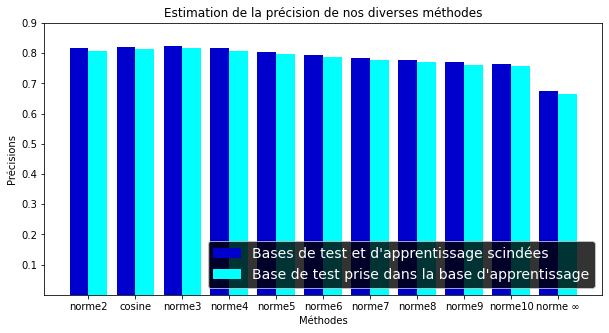

In [4]:
plt.figure(figsize=(10,5))
plt.title('Estimation de la précision de nos diverses méthodes')
plt.bar(Legende,Bases_scindees,width=-0.4, align='edge', label='Bases de test et d\'apprentissage scindées',color='mediumblue')
plt.bar(Legende,Same_base,width=0.4, align='edge', label='Base de test prise dans la base d\'apprentissage',color='cyan')
plt.xticks(Legende)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.xlabel(r'Méthodes')
plt.ylabel(r'Précisions')
plt.legend(loc='lower right',prop={'size': 14},facecolor='k', labelcolor='w')
plt.show()

In [36]:
Ecart_max=np.max(np.abs(np.array(Same_base)-np.array(Bases_scindees)))

In [37]:
print(Ecart_max)

0.010285714285714231
